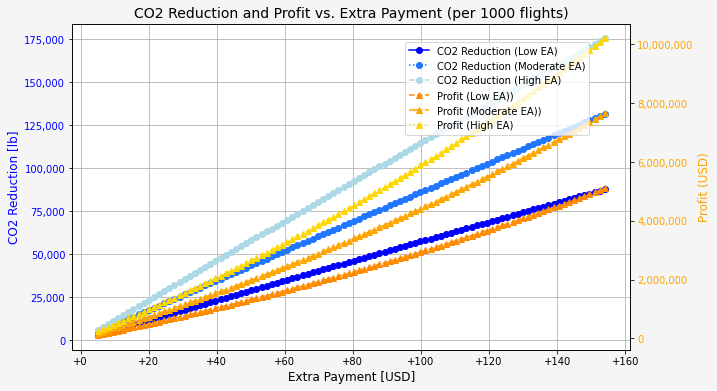

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the range of x values (USD/customer extra paid)
x = np.linspace(5, 154, 100)  # Adjust the range as needed

# Calculate the weight factors for CO2 decrease and profit using sigmoid function
weight_co2 = sigmoid(-0.0023 * x + 3)  # Adjust parameters as needed
weight_profit = 1 - weight_co2


# 1% replace of jet fuel need cost of: 360 * (6.69 - 2.85) = 1382.4 usd and cut down emission of 80% * 21.1 pound = 16.88 pound co2
# Calculate the corresponding y values for CO2 decrease and profit (low environmental awareness level)
y_co2 = 50 * x * weight_co2 / 1382.4 * 16.88 * 1000
y_profit = 50 * x * weight_profit * 10000

# Calculate the corresponding y values for CO2 decrease and profit (high environmental awareness level)
y_co2_2 = 100 * x * weight_co2 / 1382.4 * 16.88 * 1000
y_profit_2 = 100 * x * weight_profit * 10000

# Calculate the corresponding y values for CO2 decrease and profit (moderate environmental awareness level)
y_co2_3 = 75 * x * weight_co2 / 1382.4 * 16.88 * 1000
y_profit_3 = 75 * x * weight_profit * 10000

# Plot the graph
fig, ax1 = plt.subplots(figsize=(10, 6))  # Adjust figure size

# Plot CO2 decrease with blue color
ax1.plot(x, y_co2, color='b', linestyle='-', marker='o', label='CO2 Reduction (Low EA)')
ax1.plot(x, y_co2_3, color='#2176ff', linestyle=':', marker='o', label='CO2 Reduction (Moderate EA)')
ax1.plot(x, y_co2_2, color='lightblue', linestyle='--', marker='o', label='CO2 Reduction (High EA)')

# Customize x-axis
def format_func(value, tick_number):
    return f'+{int(value)}'

ax1.xaxis.set_major_formatter(FuncFormatter(format_func))
ax1.set_xlabel('Extra Payment [USD]', fontsize=12)

# Customize y-axis for CO2 decrease
ax1.set_ylabel('CO2 Reduction [lb]', color='b', fontsize=12)
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for profit
ax2 = ax1.twinx()

# Plot profit
ax2.plot(x, y_profit, color='darkorange', linestyle='--', marker='^', label='Profit (Low EA))')
ax2.plot(x, y_profit_3, color='orange', linestyle='-.', marker='^', label='Profit (Moderate EA))')
ax2.plot(x, y_profit_2, color='gold', linestyle=':', marker='^', label='Profit (High EA)')

# Customize y-axis for profit
ax2.set_ylabel('Profit (USD)', color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')

# Format y-axis tick labels to display full numbers
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
ax1.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)

# Title and legend
plt.title('CO2 Reduction and Profit vs. Extra Payment (per 1000 flights)', fontsize=14)
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.85), fontsize=10)

# Add grid lines
ax1.grid(True)

# Add background color
fig.patch.set_facecolor('#f5f5f5')  # Light gray background color

plt.show()
